In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ZCR(waveform, frame_length, hop_length):
    """
    计算信号的过零率
    过零率是一个信号符号变化的比率，即在每帧中语音信号从正变为负或从负变为正的次数。
    过零率的计算方法是：
    1. 将信号分成多个帧，每个帧的长度为frame_length，帧移为hop_length。
    2. 对每个帧，计算信号符号的变化次数。
    3. 过零率 = 符号变化次数 / 帧长度
    4. 对所有帧的过零率取平均值，得到最终的过零率。
    过零率的单位是赫兹（Hz），表示每秒钟信号符号变化的次数。
    过零率的取值范围是0到1之间，0表示信号符号不变化，1表示信号符号 always changes sign。

    :param waveform: 输入信号
    :param frame_length: 帧长度
    :param hop_length: 帧移
    :return: 过零率
    """
    pad_width = frame_length // 2
    waveform_padded = np.pad(waveform, (pad_width, pad_width), mode='reflect')

    # 计算帧数
    frame_num = int(np.ceil(len(waveform) / hop_length))

    waveform_zcr = []
    for t in range(frame_num):
        start_idx = t * hop_length
        end_idx = start_idx + frame_length
        
        # 确保不超出填充后数组的边界
        if end_idx <= len(waveform_padded):
            current_frame = waveform_padded[start_idx:end_idx]
            if len(current_frame) > 0: 
                a = np.sign(current_frame[0 : frame_length - 1])
                b = np.sign(current_frame[1 : frame_length])
                current_zcr = np.abs(a - b).sum() / 2 / frame_length
                waveform_zcr.append(current_zcr)
        else: 
            break
        # 计算过零率
    return waveform_zcr

In [9]:
def plot_zcr(waveform_zcr, sample_rate, hop_length):
    """
    绘制过零率曲线。

    参数:
    waveform_zcr (numpy.ndarray): 过零率信号，形状为 (n_frames,)。
    sample_rate (int): 音频采样率，单位为 Hz。
    hop_length (int): 帧之间的 hop 长度，单位为样本数。
    """
    # 计算时间轴
    frame_scale = np.arange(0, len(waveform_zcr))
    time_scale = librosa.frames_to_time(frame_scale, hop_length=hop_length)

    # 绘制过零率曲线
    plt.figure(figsize=(12, 8))
    plt.plot(time_scale, waveform_zcr)
    plt.xlabel('Time (s)')
    plt.ylabel('Zero Crossing Rate')
    plt.title('Zero Crossing Rate')
    plt.show()

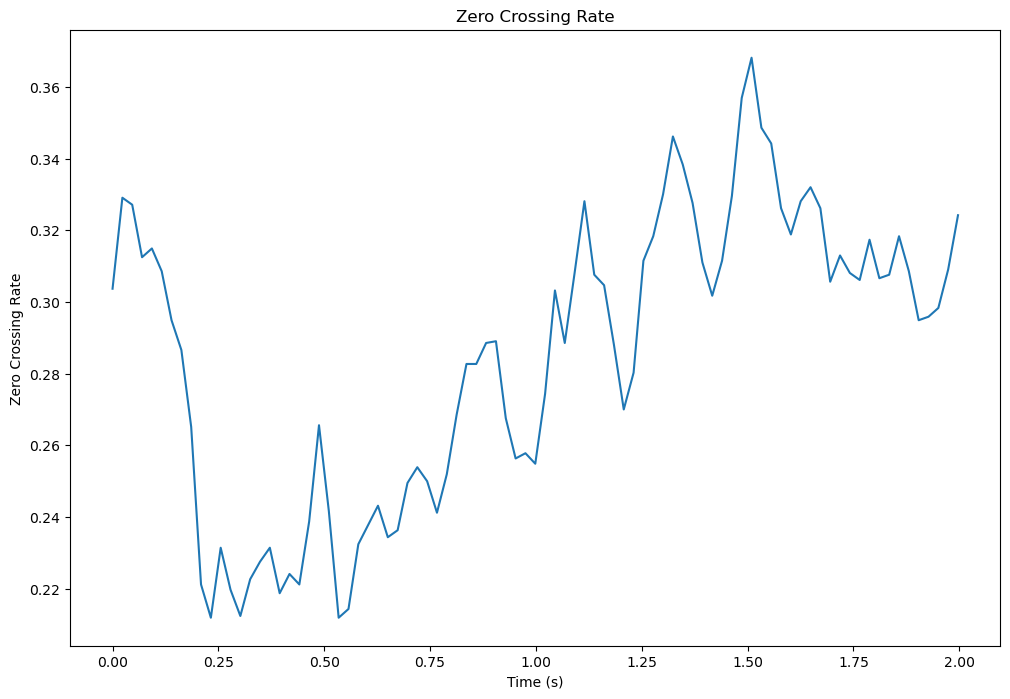

In [10]:
# 音频文件路径
audio_file = r'E:\数据集\ShipEar\data_preprocessing\3_Frame_Windows_2s_50%\6__10_07_13_marDeCangas_Entra_18.wav'

waveform, sample_rate = librosa.load(audio_file, sr=22050)

frame_length = 2048
hop_length = 512

waveform_ZCR = ZCR(waveform, frame_length, hop_length)
plot_zcr(waveform_ZCR, sample_rate, hop_length)

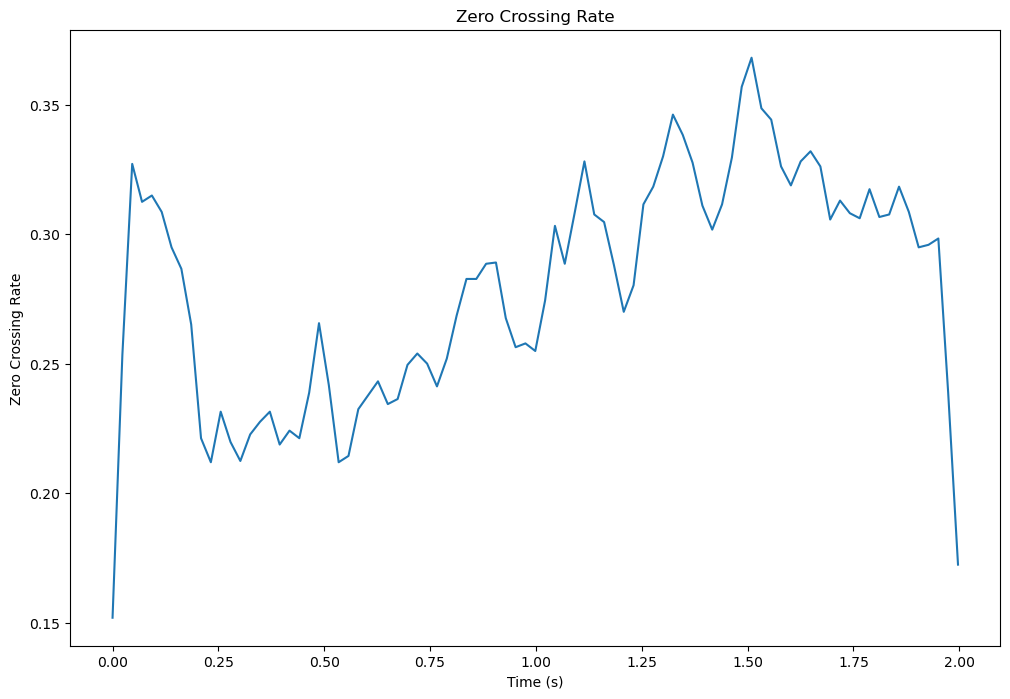

In [11]:
waveform_ZCR_librosa = librosa.feature.zero_crossing_rate(waveform, frame_length=frame_length, hop_length=hop_length)[0]
plot_zcr(waveform_ZCR_librosa, sample_rate, hop_length)